In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()

import warnings
warnings.simplefilter(action = "ignore" , category = FutureWarning)
import statsmodels.formula.api as smf
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
from scipy import stats
import scipy

from functions import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold
from sklearn.metrics import r2_score
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

import warnings
warnings.filterwarnings('ignore')


In [2]:
healthdata = pd.read_csv("analytic_data2019.csv")
healthdata.head()

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
0       statecode       countycode          fipscode              state   
1              00              000             00000                 US   
2              01              000             01000                 AL   
3              01              001             01001                 AL   
4              01              003             01003                 AL   

             Name Release Year County Ranked (Yes=1/No=0)  \
0          county         year              county_ranked   
1   United States         2019                        NaN   
2         Alabama         2019                        NaN   
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   

  Premature death raw value Premature death numerator  \
0             v001_rawvalue            v001_numerator   
1               6900.630354                   3745538   
2              9917.2328984                     80440   
3              8824.0571232                       815   
4              7224.6321603                      2827   

  Premature death denominator Premature death CI low Premature death CI high  \
0            v001_denominator             v001_cilow             v001_cihigh   
1                   908266078           6890.3492059             6910.911502   
2                    13636816           9815.1909454            10019.274852   
3                      156132           7935.3258295            9712.7884169   
4                      576496           6794.1283802            7655.1359403   

  Premature death (Black) Premature death (Hispanic) Premature death (White)  \
0         v001_race_black         v001_race_hispanic         v001_race_white   
1                     NaN                        NaN                     NaN   
2                     NaN                        NaN                     NaN   
3            10471.252986                        NaN            8706.6588323   
4            10042.472874               3086.6056945            7277.7807271   

  Poor or fair health raw value Poor or fair health numerator  \
0                 v002_rawvalue                v002_numerator   
1                           NaN                           NaN   
2                  0.2140240566                           NaN   
3                  0.1841112436                           NaN   
4                  0.1806045782                           NaN   

  Poor or fair health denominator Poor or fair health CI low  \
0                v002_denominator                 v002_cilow   
1                             NaN                        NaN   
2                             NaN               0.2009537484   
3                             NaN               0.1784404913   
4                             NaN               0.1752150037   

  Poor or fair health CI high Poor physical health days raw value  \
0                 v002_cihigh                       v036_rawvalue   
1                         NaN                                 NaN   
2                0.2277022217                        4.4004575204   
3                0.1903231618                        4.2005779826   
4                0.1858667304                        4.0987477691   

  Poor physical health days numerator Poor physical health days denominator  \
0                      v036_numerator                      v036_denominator   
1                                 NaN                                   NaN   
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   

  Poor physical health days CI low Poor physical health days CI high  \
0                       v036_cilow                       v036_cihigh   
1                              NaN                               NaN 

In [3]:
df2 = pd.read_excel("2019 County Health Rankings Data - v2.xls")
df2.head()

Unnamed: 0 Unnamed: 1 Unnamed: 2
0  A collaboration between the Robert Wood Johnso...        NaN        NaN
1                                                NaN        NaN        NaN
2  This Excel file contains the rankings and data...        NaN        NaN
3  1) Outcomes and Factors Rankings--Ranks are al...        NaN        NaN
4  2) Outcomes and Factors SubRankings--Ranks are...        NaN        NaN

In [4]:
xls = pd.ExcelFile("2019 County Health Rankings Data - v2.xls")
y = pd.read_excel(xls, "Outcomes & Factors Rankings")
df2 = pd.read_excel(xls, "Outcomes & Factors SubRankings")
df3 = pd.read_excel(xls, "Ranked Measure Data")
life_exp = pd.read_excel(xls, "Additional Measure Data")

In [ ]:
y.head()

In [5]:
life_exp = pd.read_excel(xls, "Additional Measure Data" , skiprows = 1)
life_exp

FIPS    State      County  Life Expectancy  95% CI - Low  \
0      1001  Alabama     Autauga        76.330589     75.554117   
1      1003  Alabama     Baldwin        78.599498     78.208357   
2      1005  Alabama     Barbour        75.779457     74.639355   
3      1007  Alabama        Bibb        73.928271     72.624611   
4      1009  Alabama      Blount        74.597767     73.810999   
...     ...      ...         ...              ...           ...   
3137  56037  Wyoming  Sweetwater        77.840131     76.943454   
3138  56039  Wyoming       Teton        87.438200     85.487562   
3139  56041  Wyoming       Uinta        78.397790     76.905128   
3140  56043  Wyoming    Washakie        80.465989     78.577420   
3141  56045  Wyoming      Weston        81.596294     79.372169   

      95% CI - High  Life Expectancy (Black)  Life Expectancy (Hispanic)  \
0         77.107061                74.600628                         NaN   
1         78.990639                75.628919                   98.039893   
2         76.919559                74.240228                         NaN   
3         75.231931                72.294686                         NaN   
4         75.384535                      NaN                   78.577094   
...             ...                      ...                         ...   
3137      78.736807                      NaN                   79.057364   
3138      89.388837                      NaN                   82.452056   
3139      79.890452                      NaN                   77.587425   
3140      82.354558                      NaN                         NaN   
3141      83.820420                      NaN                         NaN   

      Life Expectancy (White)  # Deaths  Age-Adjusted Mortality  \
0                   76.337219     815.0                   438.7   
1                   78.537003    2827.0                   348.4   
2                   77.568384     451.0                   469.8   
3                   74.109510     445.0                   563.7   
4                   74.098247    1050.0                   501.8   
...                       ...       ...                     ...   
3137                77.366510     495.0                   363.3   
3138                86.664388     124.0                   153.0   
3139                77.873113     262.0                   385.8   
3140                      NaN     108.0                   325.0   
3141                      NaN      82.0                   283.8   

      95% CI - Low.1  95% CI - High.1  Age-Adjusted Mortality (Black)  \
0              408.0            469.4                      532.977595   
1              334.8            362.0                      511.027189   
2              424.6            514.9                      541.700115   
3              510.3            617.1                      700.414208   
4              470.1            533.4                             NaN   
...              ...              ...                             ...   
3137           330.6            396.0                             NaN   
3138           125.1            181.0                             NaN   
3139           337.5            434.1                             NaN   
3140           260.1            389.8                             NaN   
3141           223.2            355.7                             NaN   

      Age-Adjusted Mortality (Hispanic)  Age-Adjusted Mortality (White)  \
0                                   NaN                      432.175847   
1                            148.312780                      345.281659   
2                                   NaN                      409.199702   
3                                   NaN                      549.844728   
4                            200.276998                      522.446862   
...                                 ...                             ...   
3137                         311.708946                      374.767735   
3138   

# Interactive Visualization of Life Expectancy By States

In [6]:
life_exp.iplot(kind = "bar" , x = "State" , y = "Life Expectancy" , xTitle = "County Name" ,
         yTitle = "Life Expectency" , title = "Life Expectancy Of States")

In [ ]:
#TO DO... Visualization of the above on Map

In [7]:
# The data dict
data = dict(type='choropleth',
            colorscale = 'ylorbr', # random selection - Yellow-Orange-Red
            locations = life_exp['State'], # passing column with state codes
            locationmode = 'USA-states',
            z = life_exp['Life Expectancy'], # What the color nar will represent
            text = life_exp['Life Expectancy'], # Newly generated column to hover 
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions"}
            ) 

# And our layout dictionary with some more arguments:
layout = dict(title = '2019 US Life Expectancy by State',
              geo = dict(scope='usa',
                         showlakes = True, # we want actual lake on the map
                         lakecolor = 'rgb(85,173,240)') # blue for lakes
             )

# Passing data and layout to the go.Figure 
choromap = go.Figure(data = [data],layout = layout)
# Passing map to iplot for plotting 
iplot(choromap)

In [7]:
healthdata.columns

Index(['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
       'State Abbreviation', 'Name', 'Release Year',
       'County Ranked (Yes=1/No=0)', 'Premature death raw value',
       'Premature death numerator', 'Premature death denominator',
       ...
       'Male population 18-44 raw value', 'Male population 45-64 raw value',
       'Male population 65+ raw value', 'Total male population raw value',
       'Female population 0-17 raw value', 'Female population 18-44 raw value',
       'Female population 45-64 raw value', 'Female population 65+ raw value',
       'Total female population raw value', 'Population growth raw value'],
      dtype='object', length=534)

In [ ]:
# healthdata.columns = healthdata.columns.str.replace(' ', '_')
# healthdata.drop([0,1], axis  = 0, inplace = True)

In [8]:
#Tidying Up columns
healthdata.columns = healthdata.columns.map(lambda x: x.replace(' ', '_'))

In [9]:
#check results
healthdata.columns

Index(['State_FIPS_Code', 'County_FIPS_Code', '5-digit_FIPS_Code',
       'State_Abbreviation', 'Name', 'Release_Year',
       'County_Ranked_(Yes=1/No=0)', 'Premature_death_raw_value',
       'Premature_death_numerator', 'Premature_death_denominator',
       ...
       'Male_population_18-44_raw_value', 'Male_population_45-64_raw_value',
       'Male_population_65+_raw_value', 'Total_male_population_raw_value',
       'Female_population_0-17_raw_value', 'Female_population_18-44_raw_value',
       'Female_population_45-64_raw_value', 'Female_population_65+_raw_value',
       'Total_female_population_raw_value', 'Population_growth_raw_value'],
      dtype='object', length=534)

# Drop Multilevel columns . you can also use the reset columns function

In [ ]:
# healthdata.reset_index(inplace = True) #dont run 

In [ ]:
# healthdata.drop(['index'],axis = 1 ,inplace = True) #dont run

In [10]:
healthdata.head()

State_FIPS_Code County_FIPS_Code 5-digit_FIPS_Code State_Abbreviation  \
0       statecode       countycode          fipscode              state   
1              00              000             00000                 US   
2              01              000             01000                 AL   
3              01              001             01001                 AL   
4              01              003             01003                 AL   

             Name Release_Year County_Ranked_(Yes=1/No=0)  \
0          county         year              county_ranked   
1   United States         2019                        NaN   
2         Alabama         2019                        NaN   
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   

  Premature_death_raw_value Premature_death_numerator  \
0             v001_rawvalue            v001_numerator   
1               6900.630354                   3745538   
2              9917.2328984                     80440   
3              8824.0571232                       815   
4              7224.6321603                      2827   

  Premature_death_denominator Premature_death_CI_low Premature_death_CI_high  \
0            v001_denominator             v001_cilow             v001_cihigh   
1                   908266078           6890.3492059             6910.911502   
2                    13636816           9815.1909454            10019.274852   
3                      156132           7935.3258295            9712.7884169   
4                      576496           6794.1283802            7655.1359403   

  Premature_death_(Black) Premature_death_(Hispanic) Premature_death_(White)  \
0         v001_race_black         v001_race_hispanic         v001_race_white   
1                     NaN                        NaN                     NaN   
2                     NaN                        NaN                     NaN   
3            10471.252986                        NaN            8706.6588323   
4            10042.472874               3086.6056945            7277.7807271   

  Poor_or_fair_health_raw_value Poor_or_fair_health_numerator  \
0                 v002_rawvalue                v002_numerator   
1                           NaN                           NaN   
2                  0.2140240566                           NaN   
3                  0.1841112436                           NaN   
4                  0.1806045782                           NaN   

  Poor_or_fair_health_denominator Poor_or_fair_health_CI_low  \
0                v002_denominator                 v002_cilow   
1                             NaN                        NaN   
2                             NaN               0.2009537484   
3                             NaN               0.1784404913   
4                             NaN               0.1752150037   

  Poor_or_fair_health_CI_high Poor_physical_health_days_raw_value  \
0                 v002_cihigh                       v036_rawvalue   
1                         NaN                                 NaN   
2                0.2277022217                        4.4004575204   
3                0.1903231618                        4.2005779826   
4                0.1858667304                        4.0987477691   

  Poor_physical_health_days_numerator Poor_physical_health_days_denominator  \
0                      v036_numerator                      v036_denominator   
1                                 NaN                                   NaN   
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   

  Poor_physical_health_days_CI_low Poor_physical_health_days_CI_high  \
0                       v036_cilow                       v036_cihigh   
1                              NaN                               NaN 

In [11]:
healthdata.drop([0,1], axis  = 0, inplace = True)

In [12]:
healthdata.head()

State_FIPS_Code County_FIPS_Code 5-digit_FIPS_Code State_Abbreviation  \
2              01              000             01000                 AL   
3              01              001             01001                 AL   
4              01              003             01003                 AL   
5              01              005             01005                 AL   
6              01              007             01007                 AL   

             Name Release_Year County_Ranked_(Yes=1/No=0)  \
2         Alabama         2019                        NaN   
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   
5  Barbour County         2019                          1   
6     Bibb County         2019                          1   

  Premature_death_raw_value Premature_death_numerator  \
2              9917.2328984                     80440   
3              8824.0571232                       815   
4              7224.6321603                      2827   
5               9586.165037                       451   
6              11783.543675                       445   

  Premature_death_denominator Premature_death_CI_low Premature_death_CI_high  \
2                    13636816           9815.1909454            10019.274852   
3                      156132           7935.3258295            9712.7884169   
4                      576496           6794.1283802            7655.1359403   
5                       72222           8200.1175409            10972.212533   
6                       63653           10159.978321            13407.109028   

  Premature_death_(Black) Premature_death_(Hispanic) Premature_death_(White)  \
2                     NaN                        NaN                     NaN   
3            10471.252986                        NaN            8706.6588323   
4            10042.472874               3086.6056945            7277.7807271   
5            11332.562909                        NaN            7309.6367188   
6             14812.53928                        NaN            11327.563749   

  Poor_or_fair_health_raw_value Poor_or_fair_health_numerator  \
2                  0.2140240566                           NaN   
3                  0.1841112436                           NaN   
4                  0.1806045782                           NaN   
5                  0.2577341563                           NaN   
6                  0.1999691186                           NaN   

  Poor_or_fair_health_denominator Poor_or_fair_health_CI_low  \
2                             NaN               0.2009537484   
3                             NaN               0.1784404913   
4                             NaN               0.1752150037   
5                             NaN               0.2510432524   
6                             NaN               0.1934741206   

  Poor_or_fair_health_CI_high Poor_physical_health_days_raw_value  \
2                0.2277022217                        4.4004575204   
3                0.1903231618                        4.2005779826   
4                0.1858667304                        4.0987477691   
5                 0.264992104                        5.0674383044   
6                0.2066359207                        4.3633772783   

  Poor_physical_health_days_numerator Poor_physical_health_days_denominator  \
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   
5                                 NaN                                   NaN   
6                                 NaN                                   NaN   

  Poor_physical_health_days_CI_low Poor_physical_health_days_CI_high  \
2                     4.1403676796                      4.6605473612   
3                     4.0359984381                      4.3675094941 

In [ ]:
#Renaming Columns

In [14]:
healthdata.rename(columns = {"5-digit_FIPS_Code" : "Zip" , "State_Abbreviation" : 'State_Abb' 
                             , "Name" : "State" , 'Release_Year' : "Year" , "County_Ranked_(Yes=1/No=0)" : "Ranked"}
                            , inplace = True)

In [15]:
for x in healthdata.columns[4:]:
    healthdata[x] = healthdata[x].astype('float64')

In [16]:
#check results
healthdata.head()

Zip State_Abb           State  Year  Ranked  Premature_death_raw_value  \
2  01000        AL         Alabama  2019     NaN                9917.232898   
3  01001        AL  Autauga County  2019     1.0                8824.057123   
4  01003        AL  Baldwin County  2019     1.0                7224.632160   
5  01005        AL  Barbour County  2019     1.0                9586.165037   
6  01007        AL     Bibb County  2019     1.0               11783.543675   

   Poor_or_fair_health_raw_value  Poor_physical_health_days_raw_value  \
2                       0.214024                             4.400458   
3                       0.184111                             4.200578   
4                       0.180605                             4.098748   
5                       0.257734                             5.067438   
6                       0.199969                             4.363377   

   Poor_mental_health_days_raw_value  Low_birthweight_raw_value  \
2                           4.577367                   0.101455   
3                           4.306739                   0.084757   
4                           4.249649                   0.083387   
5                           4.634994                   0.109526   
6                           4.315710                   0.111050   

   Adult_smoking_raw_value  Adult_obesity_raw_value  \
2                 0.215382                    0.351   
3                 0.191247                    0.375   
4                 0.167955                    0.310   
5                 0.215409                    0.443   
6                 0.199164                    0.378   

   Food_environment_index_raw_value  Physical_inactivity_raw_value  \
2                               5.8                          0.282   
3                               7.2                          0.311   
4                               8.0                          0.238   
5                               5.6                          0.282   
6                               7.6                          0.349   

   Access_to_exercise_opportunities_raw_value  Excessive_drinking_raw_value  \
2                                    0.616496                      0.141781   
3                                    0.686775                      0.168780   
4                                    0.719710                      0.167150   
5                                    0.536257                      0.126987   
6                                    0.162514                      0.159252   

   Alcohol-impaired_driving_deaths_raw_value  \
2                                   0.285903   
3                                   0.288136   
4                                   0.318750   
5                                   0.296296   
6                                   0.272727   

   Sexually_transmitted_infections_raw_value  Teen_births_raw_value  \
2                                      543.6              33.113480   
3                                      341.2              26.524208   
4                                      338.8              29.594009   
5                                      557.9              45.092838   
6                                      302.1              45.454545   

   Uninsured_raw_value  Primary_care_physicians_raw_value  \
2             0.107718                           0.000654   
3             0.085010                           0.000415   
4             0.106993                           0.000729   
5             0.125132                           0.000385   
6             0.096801                           0.000574   

   Ratio_of_population_to_primary_care_physicians.  Dentists_raw_value  \
2                                      1529.339623            0.000476   
3                                      2409.391304            0.000324   
4                                      1372.125000            0.000499   
5                                      2596.500000            0.000356   
6       

In [17]:
def drop_na_columns(dataframe, list_of_columns, threshold):
    """Drop columns where number of null entries in a column exceeds a user-set percentage threshold"""
    n = dataframe.shape[0]
    to_drop = [column for column in list_of_columns if (dataframe[column].isnull().sum() / n) > threshold]
    dataframe.drop(to_drop, axis = 1, inplace = True)
    print ('Number of dropped columns: {}'.format(len(to_drop)))
    print ('\n')
    print ('Dropped columns: \n', to_drop)

In [18]:
#check results
drop_na_columns(healthdata, healthdata.columns, threshold = 0.5)

Number of dropped columns: 36


Dropped columns: 
 ['Infant_mortality_raw_value', 'Disconnected_youth_raw_value', 'Homicides_raw_value', 'Communicable_disease_raw_value', 'Self-inflicted_injury_hospitalizations_raw_value', 'Cancer_incidence_raw_value', 'Coronary_heart_disease_hospitalizations_raw_value', 'Cerebrovascular_disease_hospitalizations_raw_value', 'Smoking_during_pregnancy_raw_value', 'Drug_arrests_raw_value', 'Opioid_hospital_visits_raw_value', 'Alcohol-related_hospitalizations_raw_value', 'Motor_vehicle_crash_occupancy_rate_raw_value', 'On-road_motor_vehicle_crash-related_ER_visits_raw_value', 'Off-road_motor_vehicle_crash-related_ER_visits_raw_value', 'Childhood_immunizations_raw_value', 'Reading_proficiency_raw_value', 'W-2_enrollment_raw_value', 'Poverty_raw_value', 'Older_adults_living_alone_raw_value', 'Hate_crimes_raw_value', 'Child_abuse_raw_value', 'Injury_hospitalizations_raw_value', 'Fall_fatalities_65+_raw_value', 'Year_structure_built_raw_value', 'Male_populatio

In [ ]:
#Saving file to system

In [20]:
healthdata.to_csv('Cleaned_health_data.csv')

In [21]:
df = pd.read_csv("Cleaned_health_data.csv")
df.head()

Unnamed: 0   Zip State_Abb           State  Year  Ranked  \
0           3  1001        AL  Autauga County  2019     1.0   
1           4  1003        AL  Baldwin County  2019     1.0   
2           5  1005        AL  Barbour County  2019     1.0   
3           6  1007        AL     Bibb County  2019     1.0   
4           7  1009        AL   Blount County  2019     1.0   

   Premature_death_raw_value  Poor_or_fair_health_raw_value  \
0                8824.057123                       0.184111   
1                7224.632160                       0.180605   
2                9586.165037                       0.257734   
3               11783.543675                       0.199969   
4               10908.101822                       0.210953   

   Poor_physical_health_days_raw_value  Poor_mental_health_days_raw_value  \
0                             4.200578                           4.306739   
1                             4.098748                           4.249649   
2                             5.067438                           4.634994   
3                             4.363377                           4.315710   
4                             4.512753                           4.701599   

   Low_birthweight_raw_value  Adult_smoking_raw_value  \
0                   0.084757                 0.191247   
1                   0.083387                 0.167955   
2                   0.109526                 0.215409   
3                   0.111050                 0.199164   
4                   0.079268                 0.196522   

   Adult_obesity_raw_value  Food_environment_index_raw_value  \
0                    0.375                               7.2   
1                    0.310                               8.0   
2                    0.443                               5.6   
3                    0.378                               7.6   
4                    0.344                               8.5   

   Physical_inactivity_raw_value  Access_to_exercise_opportunities_raw_value  \
0                          0.311                                    0.686775   
1                          0.238                                    0.719710   
2                          0.282                                    0.536257   
3                          0.349                                    0.162514   
4                          0.285                                    0.229493   

   Excessive_drinking_raw_value  Alcohol-impaired_driving_deaths_raw_value  \
0                      0.168780                                   0.288136   
1                      0.167150                                   0.318750   
2                      0.126987                                   0.296296   
3                      0.159252                                   0.272727   
4                      0.153787                                   0.218750   

   Sexually_transmitted_infections_raw_value  Teen_births_raw_value  \
0                                      341.2              26.524208   
1                                      338.8              29.594009   
2                                      557.9              45.092838   
3                                      302.1              45.454545   
4                                      114.3              35.600555   

   Uninsured_raw_value  Primary_care_physicians_raw_value  \
0             0.085010                           0.000415   
1             0.106993                           0.000729   
2             0.125132                           0.000385   
3             0.096801                           0.000574   
4             0.121140                           0.000225   

   Ratio_of_population_to_primary_care_physicians.  Dentists_raw_value  \
0                                      2409.391304            0.000324   
1                                      1372.125000            0.000499   
2                                      2596.500000            0.000356   
3             

In [22]:
df.dtypes

Unnamed: 0                                 int64
Zip                                        int64
State_Abb                                 object
State                                     object
Year                                       int64
                                          ...   
%_Hispanic_raw_value                     float64
%_Non-Hispanic_white_raw_value           float64
%_not_proficient_in_English_raw_value    float64
%_Females_raw_value                      float64
%_Rural_raw_value                        float64
Length: 82, dtype: object

In [23]:
df.isnull().sum()

Unnamed: 0                               0
Zip                                      0
State_Abb                                0
State                                    0
Year                                     0
                                        ..
%_Hispanic_raw_value                     0
%_Non-Hispanic_white_raw_value           0
%_not_proficient_in_English_raw_value    0
%_Females_raw_value                      0
%_Rural_raw_value                        7
Length: 82, dtype: int64

In [24]:
df.dropna(inplace = True)

In [25]:
for x in df.columns[4:]:
    df[x] = df[x].astype('float64')

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
def encode_features(data_set, feature_names):
    for feature_name in feature_names:
        le = LabelEncoder()
        le.fit(data_set[feature_name])
        encoded_column = le.transform(data_set[feature_name])
        data_set[feature_name] = encoded_column
    return data_set

In [28]:
features_to_encode = ['State','State_Abb','Life_expectancy_raw_value']
encode_data = encode_features(df, features_to_encode)
encode_data.head(10)

Unnamed: 0   Zip  State_Abb  State    Year  Ranked  \
0            3  1001          0     36  2019.0     1.0   
1            4  1003          0     39  2019.0     1.0   
3            6  1007          0     69  2019.0     1.0   
4            7  1009          0     73  2019.0     1.0   
7           10  1015          0    113  2019.0     1.0   
10          13  1021          0    158  2019.0     1.0   
15          18  1031          0    180  2019.0     1.0   
16          19  1033          0    181  2019.0     1.0   
21          24  1043          0    208  2019.0     1.0   
22          25  1045          0    216  2019.0     1.0   

    Premature_death_raw_value  Poor_or_fair_health_raw_value  \
0                 8824.057123                       0.184111   
1                 7224.632160                       0.180605   
3                11783.543675                       0.199969   
4                10908.101822                       0.210953   
7                12217.759984                       0.195847   
10               10831.917358                       0.214653   
15                7933.129666                       0.202269   
16               10332.484038                       0.202499   
21               10007.614724                       0.207042   
22                9637.456481                       0.226133   

    Poor_physical_health_days_raw_value  Poor_mental_health_days_raw_value  \
0                              4.200578                           4.306739   
1                              4.098748                           4.249649   
3                              4.363377                           4.315710   
4                              4.512753                           4.701599   
7                              4.290448                           4.476572   
10                             4.736277                           4.625572   
15                             4.548244                           4.606067   
16                             4.337048                           4.491632   
21                             4.496509                           4.750577   
22                             4.716841                           4.441555   

    Low_birthweight_raw_value  Adult_smoking_raw_value  \
0                    0.084757                 0.191247   
1                    0.083387                 0.167955   
3                    0.111050                 0.199164   
4                    0.079268                 0.196522   
7                    0.090023                 0.204622   
10                   0.086144                 0.196733   
15                   0.082015                 0.182012   
16                   0.100303                 0.183711   
21                   0.081046                 0.203406   
22                   0.085450                 0.186122   

    Adult_obesity_raw_value  Food_environment_index_raw_value  \
0                     0.375                               7.2   
1                     0.310                               8.0   
3                     0.378                               7.6   
4                     0.344                               8.5   
7                     0.371                               6.9   
10                    0.353                               8.1   
15                    0.334                               7.5   
16                    0.325                               7.4   
21                    0.345                               8.3   
22                    0.373                               6.7   

    Physical_inactivity_raw_value  Access_to_exercise_opportunities_raw_value  \
0                           0.311                                    0.686775   
1                           0.238                                    0.719710   
3                           0.349                                    0.162514   
4                           0.285                                    0.229493   
7                           0.302        

In [29]:
cat_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
cat_cols

[]

In [30]:
#numercial columns
num_cols = list(df._get_numeric_data().columns)
num_cols

['Unnamed: 0',
 'Zip',
 'State_Abb',
 'State',
 'Year',
 'Ranked',
 'Premature_death_raw_value',
 'Poor_or_fair_health_raw_value',
 'Poor_physical_health_days_raw_value',
 'Poor_mental_health_days_raw_value',
 'Low_birthweight_raw_value',
 'Adult_smoking_raw_value',
 'Adult_obesity_raw_value',
 'Food_environment_index_raw_value',
 'Physical_inactivity_raw_value',
 'Access_to_exercise_opportunities_raw_value',
 'Excessive_drinking_raw_value',
 'Alcohol-impaired_driving_deaths_raw_value',
 'Sexually_transmitted_infections_raw_value',
 'Teen_births_raw_value',
 'Uninsured_raw_value',
 'Primary_care_physicians_raw_value',
 'Ratio_of_population_to_primary_care_physicians.',
 'Dentists_raw_value',
 'Ratio_of_population_to_dentists.',
 'Mental_health_providers_raw_value',
 'Ratio_of_population_to_mental_health_providers.',
 'Preventable_hospital_stays_raw_value',
 'Mammography_screening_raw_value',
 'Flu_vaccinations_raw_value',
 'High_school_graduation_raw_value',
 'Some_college_raw_value',


In [31]:
target = "Life_expectancy_raw_value"

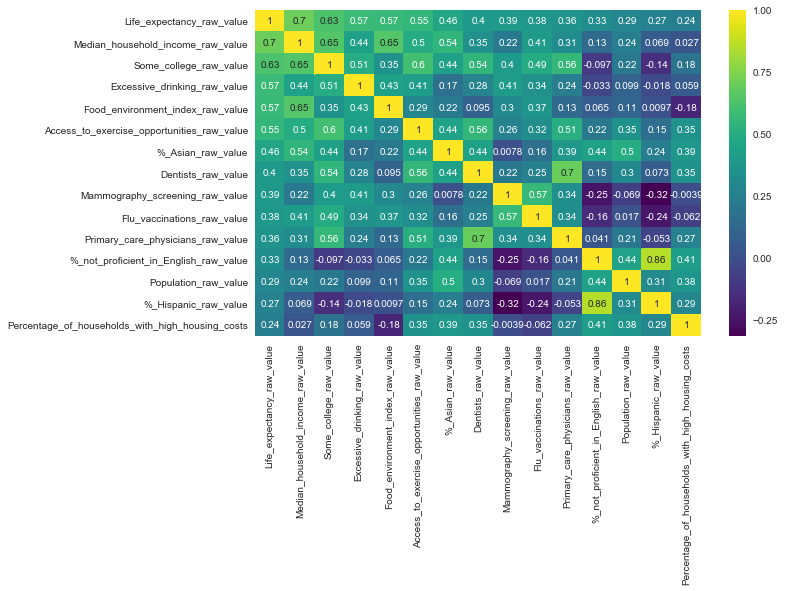

In [32]:
k = 15
cols = df[num_cols].corr().nlargest(k , target)[target].index
cm = df[cols].corr()
plt.figure(figsize = (10 , 6))
sns.heatmap(cm , annot = True , cmap = "viridis")

# Running Baseline Model

In [80]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [85]:
cros_val = KFold(n_splits=10, random_state=1, shuffle=True)
scaler = MinMaxScaler()
y = df['Life_expectancy_raw_value']

xset = df.drop(['State','County','State_Abb','Year','County',"Ranked",'Life_expectancy_raw_value',],axis=1)
xset = xset.select_dtypes(exclude=['object'])
X = scaler.fit_transform(xset)

#X_train, X_test, y_train, y_test = train_test_split(X,y)

linreg = LinearRegression()
baseline = np.mean(cross_val_score(linreg,X,y,scoring='r2',cv=cros_val))
baseline

0.9374647807430059

# <span id="3"></span> Defining a Function to Calculate the Adjusted $R^{2}$
#### [Return Contents](#0)
<hr/>

The R-squared increases when the number of features increase. Because of this, sometimes a more robust evaluator is preferred to compare the performance between different models. This evaluater is called adjusted R-squared and it only increases, if the addition of the variable reduces the MSE. The definition of the adjusted  𝑅2  is:


$\bar{R^{2}}=R^{2}-\frac{k-1}{n-k}(1-R^{2})$

where  𝑛  is the number of observations and  𝑘  is the number of parameters.

## Simple Linear Regression

When we model a linear relationship between a response and **just one** explanatory variable, this is called **simple linear regression**. I want to predict Life Expectancy and then, our response variable is Life Expectancy. However, for a simple model we also need to select a feature. When I look at the columns of the dataset, Food Insecure seemed the one of the most important feature. When we examine the  <a href=#7>correlation matrix</a>, we may observe that life expectancy has the highest correlation coefficient with Food insecurity 
, physical distress etc and this also supports my opinion. Thus, I decided to use **living area (sqft)** as feature but if you want to examine the relationship between price and another feature, you may prefer that feature.

In [38]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [47]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})


In [43]:
from sklearn import metrics

In [40]:
from sklearn import linear_model

In [73]:
#%%capture
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['Median_household_income_raw_value'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['Life_expectancy_raw_value'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['Median_household_income_raw_value'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['Life_expectancy_raw_value'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['Median_household_income_raw_value']],df['Life_expectancy_raw_value'],cv=5).mean(),'.3f'))

print ("Average Life Expectancy for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation


Average Life Expectancy for Test Data: 627.217
Intercept: -324.5249937348781
Coefficient: [0.01696514]


Model Details  Root Mean Squared Error (RMSE)  \
0  Simple Linear Regression       -                         271.345   
1  Simple Linear Regression       -                         271.345   
2  Simple Linear Regression       -                         271.345   
3  Simple Linear Regression       -                         271.345   
4  Simple Linear Regression       -                         271.345   
5  Simple Linear Regression       -                         271.345   
6  Simple Linear Regression       -                         271.345   
7  Simple Linear Regression       -                         271.345   

   R-squared (training) Adjusted R-squared (training)  R-squared (test)  \
0                 0.501                             -             0.479   
1                 0.501                             -             0.479   
2                 0.501                             -             0.479   
3                 0.501                             -             0.479   
4                 0.501                             -             0.479   
5                 0.501                             -             0.479   
6                 0.501                             -             0.479   
7                 0.501                             -             0.479   

  Adjusted R-squared (test)  5-Fold Cross Validation  
0                         -                    0.462  
1                         -                    0.462  
2                         -                    0.462  
3                         -                    0.462  
4                         -                    0.462  
5                         -                    0.462  
6                         -                    0.462  
7                         -                    0.462

[](http://)I also printed the intercept and coefficient for the simple linear regression. By using these values and the below definition, we can estimate the Life expectancy manually. The equation we use for our estimations is called hypothesis function and defined as

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x$$

## <span id="5"></span> Let's Show the Result

Since we have just two dimensions at the simple regression, it is easy to draw it. The below chart determines the result of the simple regression. It does not look like a perfect fit but when we work with real world datasets, having a perfect fit is not easy.

In [62]:
sns.set(style="white", font_scale=1)

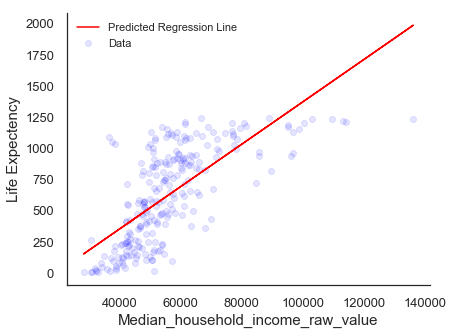

In [67]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='blue',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Median_household_income_raw_value", fontsize=15)
plt.ylabel("Life Expectency", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

['%_Asian_raw_value_%_Hispanic_raw_value', '%_Asian_raw_value_%_Non-Hispanic_white_raw_value', '%_Asian_raw_value_%_not_proficient_in_English_raw_value', '%_Asian_raw_value_%_Females_raw_value', '%_Asian_raw_value_%_Rural_raw_value', '%_Native_Hawaiian/Other_Pacific_Islander_raw_value_%_Hispanic_raw_value', '%_Native_Hawaiian/Other_Pacific_Islander_raw_value_%_Non-Hispanic_white_raw_value', '%_Native_Hawaiian/Other_Pacific_Islander_raw_value_%_not_proficient_in_English_raw_value', '%_Native_Hawaiian/Other_Pacific_Islander_raw_value_%_Females_raw_value', '%_Native_Hawaiian/Other_Pacific_Islander_raw_value_%_Rural_raw_value', '%_Hispanic_raw_value_%_Non-Hispanic_white_raw_value', '%_Hispanic_raw_value_%_not_proficient_in_English_raw_value', '%_Hispanic_raw_value_%_Females_raw_value', '%_Hispanic_raw_value_%_Rural_raw_value', '%_Non-Hispanic_white_raw_value_%_not_proficient_in_English_raw_value', '%_Non-Hispanic_white_raw_value_%_Females_raw_value', '%_Non-Hispanic_white_raw_value_%_Rural_raw_value', '%_not_proficient_in_English_raw_value_%_Females_raw_value', '%_not_proficient_in_English_raw_value_%_Rural_raw_value', '%_Females_raw_value_%_Rural_raw_value']

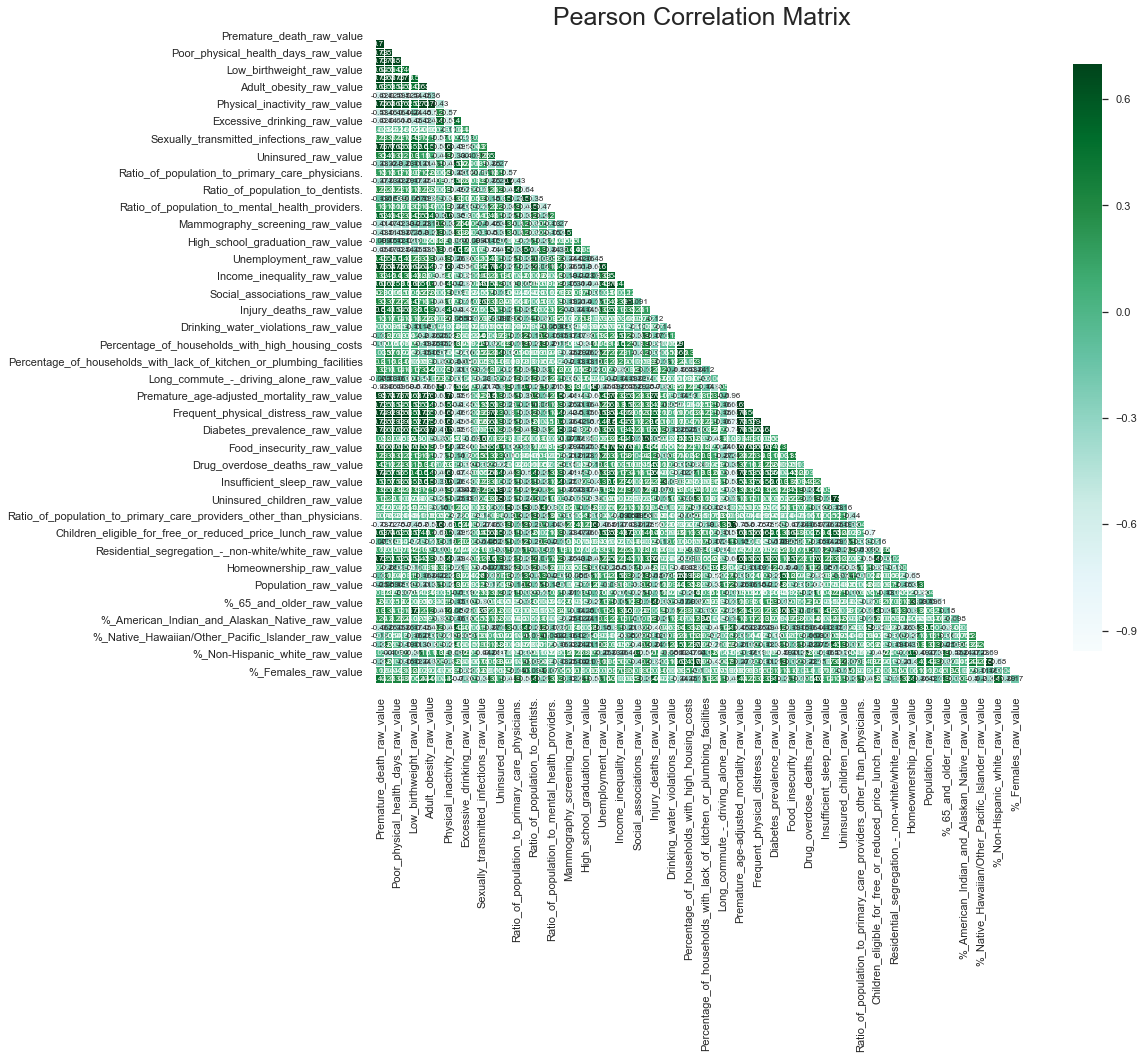

In [74]:
features = ['Premature_death_raw_value',
 'Poor_or_fair_health_raw_value',
 'Poor_physical_health_days_raw_value',
 'Poor_mental_health_days_raw_value',
 'Low_birthweight_raw_value',
 'Adult_smoking_raw_value',
 'Adult_obesity_raw_value',
 'Food_environment_index_raw_value',
 'Physical_inactivity_raw_value',
 'Access_to_exercise_opportunities_raw_value',
 'Excessive_drinking_raw_value',
 'Alcohol-impaired_driving_deaths_raw_value',
 'Sexually_transmitted_infections_raw_value',
 'Teen_births_raw_value',
 'Uninsured_raw_value',
 'Primary_care_physicians_raw_value',
 'Ratio_of_population_to_primary_care_physicians.',
 'Dentists_raw_value',
 'Ratio_of_population_to_dentists.',
 'Mental_health_providers_raw_value',
 'Ratio_of_population_to_mental_health_providers.',
 'Preventable_hospital_stays_raw_value',
 'Mammography_screening_raw_value',
 'Flu_vaccinations_raw_value',
 'High_school_graduation_raw_value',
 'Some_college_raw_value',
 'Unemployment_raw_value',
 'Children_in_poverty_raw_value',
 'Income_inequality_raw_value',
 'Children_in_single-parent_households_raw_value',
 'Social_associations_raw_value',
 'Violent_crime_raw_value',
 'Injury_deaths_raw_value',
 'Air_pollution_-_particulate_matter_raw_value',
 'Drinking_water_violations_raw_value',
 'Severe_housing_problems_raw_value',
 'Percentage_of_households_with_high_housing_costs',
 'Percentage_of_households_with_overcrowding',
 'Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities',
 'Driving_alone_to_work_raw_value',
 'Long_commute_-_driving_alone_raw_value',
 'Life_expectancy_raw_value',
 'Premature_age-adjusted_mortality_raw_value',
 'Child_mortality_raw_value',
 'Frequent_physical_distress_raw_value',
 'Frequent_mental_distress_raw_value',
 'Diabetes_prevalence_raw_value',
 'HIV_prevalence_raw_value',
 'Food_insecurity_raw_value',
 'Limited_access_to_healthy_foods_raw_value',
 'Drug_overdose_deaths_raw_value',
 'Motor_vehicle_crash_deaths_raw_value',
 'Insufficient_sleep_raw_value',
 'Uninsured_adults_raw_value',
 'Uninsured_children_raw_value',
 'Other_primary_care_providers_raw_value',
 'Ratio_of_population_to_primary_care_providers_other_than_physicians.',
 'Median_household_income_raw_value',
 'Children_eligible_for_free_or_reduced_price_lunch_raw_value',
 'Residential_segregation_-_Black/White_raw_value',
 'Residential_segregation_-_non-white/white_raw_value',
 'Firearm_fatalities_raw_value',
 'Homeownership_raw_value',
 'Severe_housing_cost_burden_raw_value',
 'Population_raw_value',
 '%_below_18_years_of_age_raw_value',
 '%_65_and_older_raw_value',
 '%_Non-Hispanic_African_American_raw_value',
 '%_American_Indian_and_Alaskan_Native_raw_value',
 '%_Asian_raw_value',
 '%_Native_Hawaiian/Other_Pacific_Islander_raw_value',
 '%_Hispanic_raw_value',
 '%_Non-Hispanic_white_raw_value',
 '%_not_proficient_in_English_raw_value',
 '%_Females_raw_value',
 '%_Rural_raw_value']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

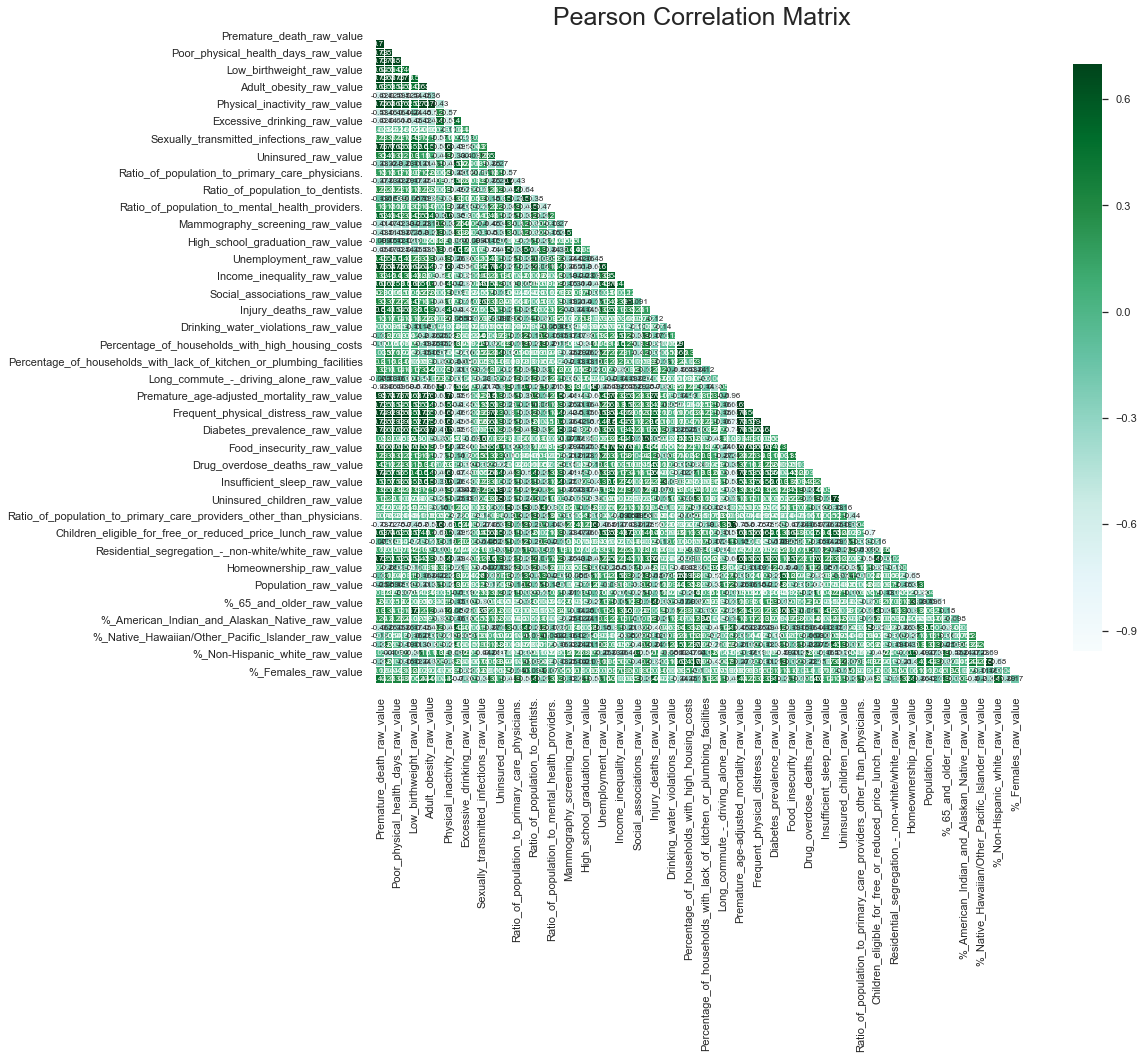

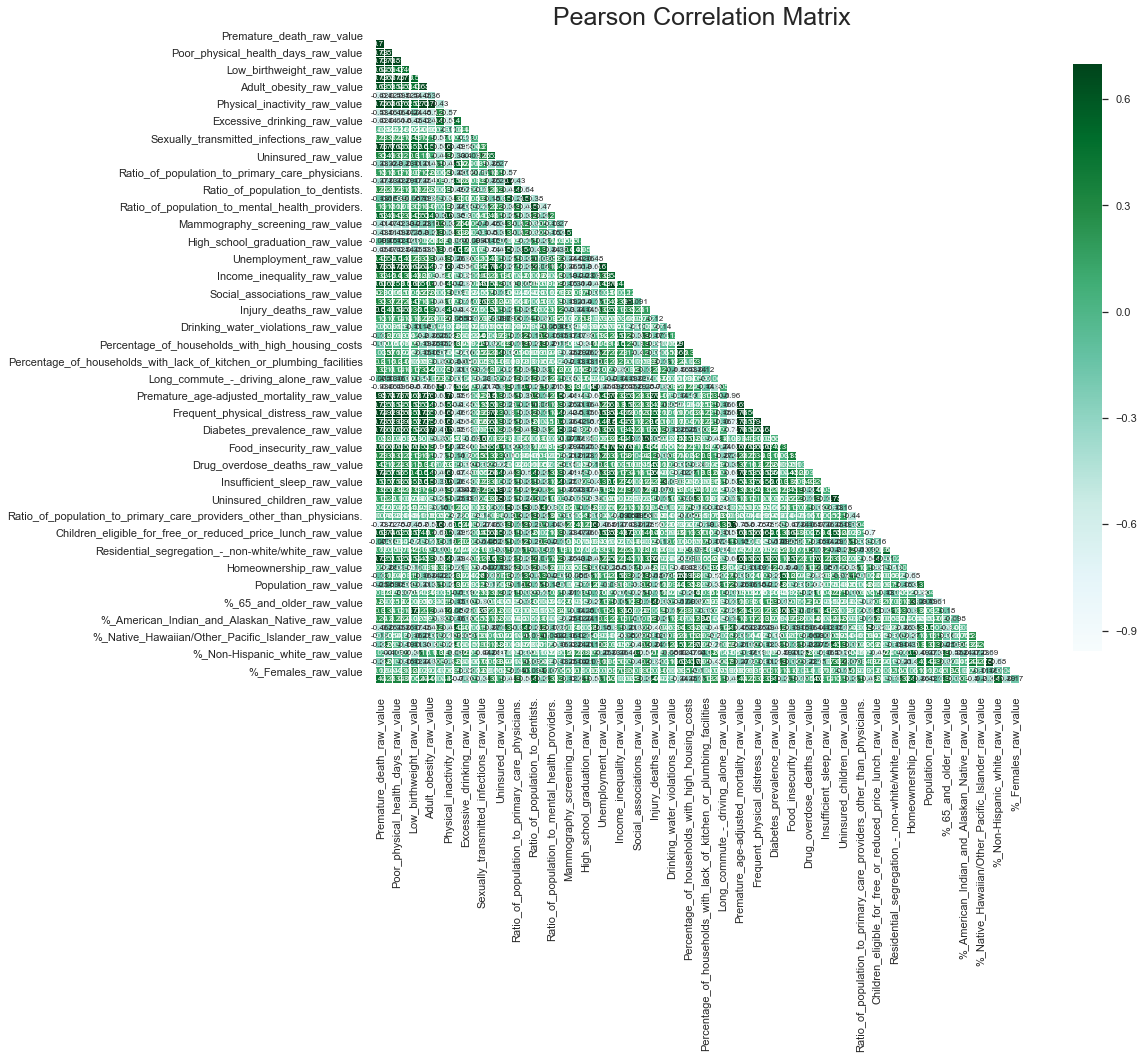

In [87]:
features2 = ['Premature_death_raw_value',
 'Poor_or_fair_health_raw_value',
 'Poor_physical_health_days_raw_value',
 'Poor_mental_health_days_raw_value',
 'Low_birthweight_raw_value',
 'Adult_smoking_raw_value',
 'Adult_obesity_raw_value',
 'Food_environment_index_raw_value',
 'Physical_inactivity_raw_value',
 'Access_to_exercise_opportunities_raw_value',
 'Excessive_drinking_raw_value',
 'Alcohol-impaired_driving_deaths_raw_value',
 'Sexually_transmitted_infections_raw_value',
 'Teen_births_raw_value',
 'Uninsured_raw_value',
 'Primary_care_physicians_raw_value',
 'Ratio_of_population_to_primary_care_physicians.',
 'Dentists_raw_value',
 'Ratio_of_population_to_dentists.',
 'Mental_health_providers_raw_value',
 'Ratio_of_population_to_mental_health_providers.']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [88]:
df_dm=df.copy()
df_dm.describe()

Unnamed: 0           Zip    State_Abb        State    Year  Ranked  \
count  1245.000000   1245.000000  1245.000000  1245.000000  1245.0  1245.0   
mean   1578.311647  30028.159839    21.205622   444.548594  2019.0     1.0   
std     924.263237  15184.818941    12.579374   252.366842     0.0     0.0   
min       3.000000   1001.000000     0.000000     0.000000  2019.0     1.0   
25%     731.000000  18035.000000    10.000000   235.000000  2019.0     1.0   
50%    1682.000000  30111.000000    21.000000   439.000000  2019.0     1.0   
75%    2290.000000  42011.000000    33.000000   653.000000  2019.0     1.0   
max    3190.000000  56037.000000    43.000000   895.000000  2019.0     1.0   

       Premature_death_raw_value  Poor_or_fair_health_raw_value  \
count                1245.000000                    1245.000000   
mean                 8052.920877                       0.170825   
std                  2247.510868                       0.040484   
min                  2900.417484                       0.082892   
25%                  6467.526692                       0.142096   
50%                  7825.374592                       0.165401   
75%                  9478.696165                       0.194813   
max                 18571.489514                       0.359188   

       Poor_physical_health_days_raw_value  Poor_mental_health_days_raw_value  \
count                          1245.000000                        1245.000000   
mean                              3.905012                           3.988795   
std                               0.605599                           0.509725   
min                               2.323511                           2.474197   
25%                               3.500632                           3.641614   
50%                               3.873719                           3.989233   
75%                               4.261390                           4.297367   
max                               6.396212                           5.964156   

       Low_birthweight_raw_value  Adult_smoking_raw_value  \
count                1245.000000              1245.000000   
mean                    0.081362                 0.175668   
std                     0.016001                 0.033270   
min                     0.048291                 0.067354   
25%                     0.069952                 0.152524   
50%                     0.079330                 0.175603   
75%                     0.089623                 0.198103   
max                     0.148420                 0.298470   

       Adult_obesity_raw_value  Food_environment_index_raw_value  \
count              1245.000000                       1245.000000   
mean                  0.315612                          7.636466   
std                   0.047440                          0.906977   
min                   0.138000                          1.800000   
25%                   0.288000                          7.100000   
50%                   0.320000                          7.700000   
75%                   0.349000                          8.200000   
max                   0.458000                         10.000000   

       Physical_inactivity_raw_value  \
count                    1245.000000   
mean                        0.247382   
std                         0.053445   
min                         0.093000   
25%                         0.209000   
50%                         0.249000   
75%                         0.283000   
max                         0.399000   

       Access_to_exercise_opportunities_raw_value  \
count                                 1245.000000   
mean                                     0.730567   
std                                      0.172536   
min                                      0.043634   
25%                                      0.617871   
50%                                      0.759028   
75%                                      0.859637   
max                    